## Download DataSet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/ML/traffic_class

/content/drive/MyDrive/ML/traffic_class


In [15]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle/"

In [16]:
# !kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:24<00:00, 29.7MB/s]
100% 612M/612M [00:24<00:00, 26.5MB/s]


In [3]:
%cd ..

/content/drive/MyDrive/ML


In [17]:
!unzip traffic_class/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [ ]:
# !rm traffic_class/gtsrb-german-traffic-sign.zip
# !rm -rf traffic_class/Meta
# !rm -rf traffic_class/meta
# !rm -rf traffic_class/test
# !rm -rf traffic_class/train
# !rm traffic_class/Meta.csv

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

In [5]:
%ls

 BooksDataSet.csv   DS/        traffic_class/         'Week 1'/
 dataset/           traffic/   traffic_sign_dataset/  'Week 2'/


In [6]:
%cd traffic_sign_dataset
%ls

/content/drive/MyDrive/ML/traffic_sign_dataset
meta/  Meta/  Meta.csv  test/  Test/  Test.csv  train/  Train/  Train.csv


In [7]:
data_dir = '/content/drive/MyDrive/ML/traffic_sign_dataset'
train_path = '/content/drive/MyDrive/ML/traffic_sign_dataset/Train'
test_path = '/content/drive/MyDrive/ML/traffic_sign_dataset/Test'
IMG_HEIGHT = 60
IMG_WIDTH = 60
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

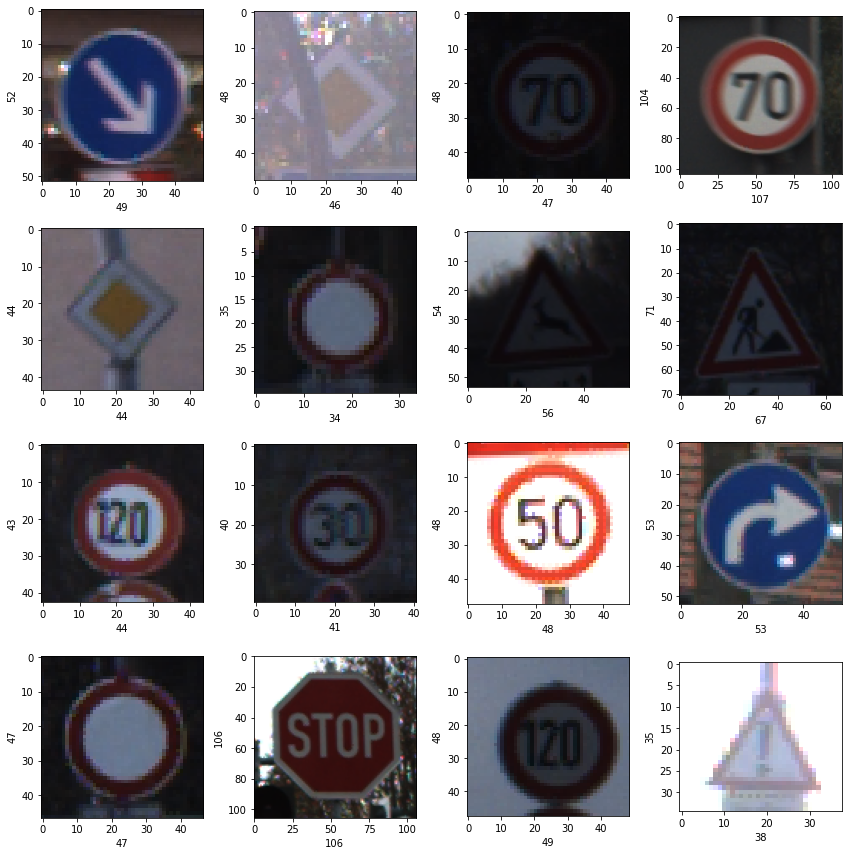

In [8]:
plt.figure(figsize=(12,12))
# path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(test_path +'/'+ random.choice(sorted(os.listdir(test_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [9]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

print(np.mean(dim1),np.mean(dim2))

50.328929582493814 50.83587951745773


In [12]:
images = []
label_id = []

for i in range(43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [13]:
images = np.array(images)
images = images/255 
label_id = np.array(label_id)
label_id.shape

(39209,)

In [14]:
images.shape

(39209, 50, 50, 3)

In [15]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [16]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [17]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [18]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [19]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [20]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 12s - loss: 2.5163 - accuracy: 0.3138 - val_loss: 1.2573 - val_accuracy: 0.7049 - 12s/epoch - 51ms/step
Epoch 2/10
246/246 - 4s - loss: 1.1384 - accuracy: 0.6465 - val_loss: 0.4592 - val_accuracy: 0.9022 - 4s/epoch - 17ms/step
Epoch 3/10
246/246 - 4s - loss: 0.7363 - accuracy: 0.7681 - val_loss: 0.2356 - val_accuracy: 0.9492 - 4s/epoch - 17ms/step
Epoch 4/10
246/246 - 4s - loss: 0.5802 - accuracy: 0.8144 - val_loss: 0.2208 - val_accuracy: 0.9625 - 4s/epoch - 17ms/step
Epoch 5/10
246/246 - 4s - loss: 0.4860 - accuracy: 0.8444 - val_loss: 0.1435 - val_accuracy: 0.9744 - 4s/epoch - 17ms/step
Epoch 6/10
246/246 - 4s - loss: 0.4261 - accuracy: 0.8629 - val_loss: 0.1152 - val_accuracy: 0.9790 - 4s/epoch - 17ms/step
Epoch 7/10
246/246 - 4s - loss: 0.3816 - accuracy: 0.8777 - val_loss: 0.0952 - val_accuracy: 0.9795 - 4s/epoch - 17ms/step
Epoch 8/10
246/246 - 4s - loss: 0.3376 - accuracy: 0.8912 - val_loss: 0.0821 - val_accuracy: 0.9844 - 4s/epoch - 17ms/step
Epoch 9/10
246

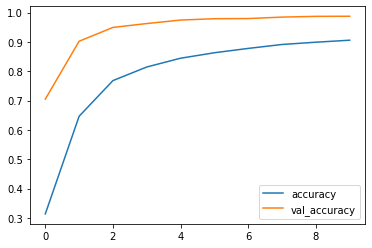

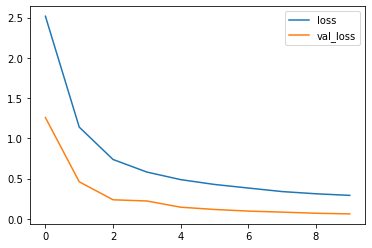

In [21]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [22]:
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [25]:
!rm /content/drive/MyDrive/ML/traffic_sign_dataset/Test/GT-final_test.csv

In [26]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [29]:
test = pd.read_csv(data_dir +'/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [31]:
y_pred = model.predict(test_images);
y_pred

395/395 [==============================] - 2s 4ms/step


array([[4.6709542e-20, 1.1406536e-17, 5.3949880e-14, ..., 2.3773265e-17,
        9.4356169e-21, 7.1119543e-13],
       [4.4250619e-06, 9.9993300e-01, 1.8358039e-08, ..., 1.1535413e-20,
        2.3443268e-24, 1.9185657e-24],
       [0.0000000e+00, 0.0000000e+00, 3.3131197e-32, ..., 8.9211668e-23,
        2.8825490e-28, 1.1187549e-31],
       ...,
       [8.8292910e-07, 1.8719510e-04, 3.9916541e-03, ..., 2.6861017e-04,
        3.6044692e-04, 1.8560403e-03],
       [3.9783090e-06, 4.1825374e-04, 9.1316557e-04, ..., 9.1178532e-07,
        3.1819063e-08, 2.5601350e-04],
       [5.4216139e-07, 8.5854466e-05, 6.6714216e-05, ..., 8.3358621e-08,
        5.4615992e-09, 3.7467602e-05]], dtype=float32)

In [32]:
y_classes = y_pred.argmax(axis=-1)

In [33]:
y_classes

array([16,  1, 38, ..., 38,  7, 10])

In [34]:
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

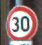

In [35]:
img = Image.open(test_path + '/00001.png')
img

In [37]:
print("Original label : ",all_lables[y_test[1]])
print("Predicted label : ",all_lables[y_classes[1]])

Original label :  Speed limit (30km/h)
Predicted label :  Speed limit (30km/h)
